In [1]:
# lab7_knn_all_exercises.ipynb
# 22 Jun 2025
# Lab: k-Nearest Neighbors (KNN) for Classification and Regression

# **Lab: k-Nearest Neighbors (KNN) for Classification and Regression**

## **Lab Objectives**
1. Understand the **fundamentals of KNN** for classification and regression.
2. Learn how to **choose optimal K** using cross-validation.
3. Implement KNN in Python using `scikit-learn`.
4. Visualize decision boundaries and performance metrics.

---

# **Program 1: KNN Classification with Synthetic Data**
### **Objective**: Implement KNN classification and visualize decision boundaries.

```python
"""
KNN CLASSIFICATION DEMONSTRATION
================================

1. Generate synthetic classification data
2. Train a KNN classifier
3. Visualize decision boundaries
4. Evaluate model performance
"""

===================STEP 1: GENERATE SYNTHETIC DATA====================

Training set size: 350
Test set size: 150


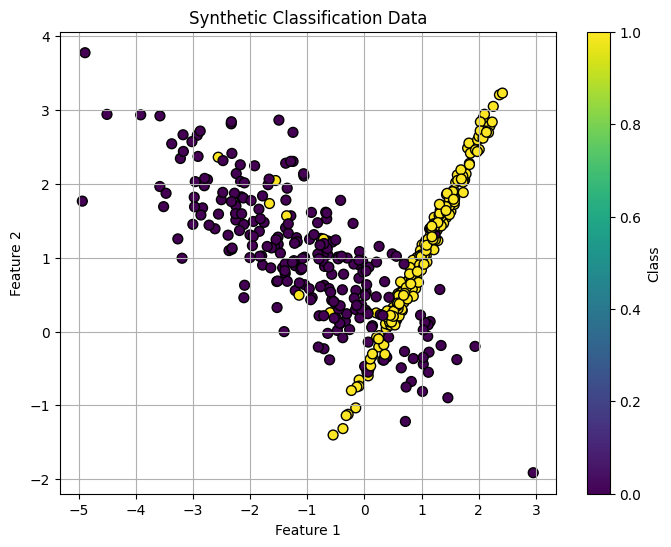

STEP 2: TRAIN KNN CLASSIFIER=====================
STEP 3: EVALUATE PERFORMANCE=====================

Test Accuracy: 0.947


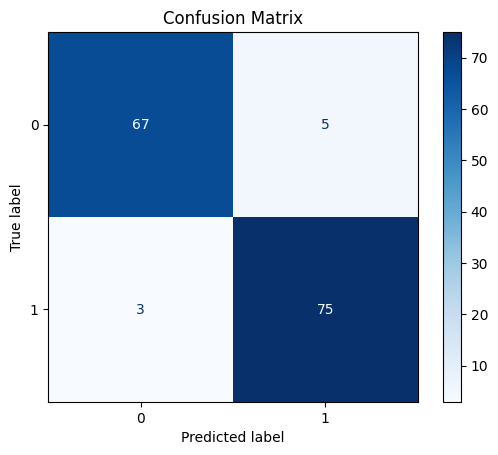

STEP 4: VISUALIZE DECISION BOUNDARIES================


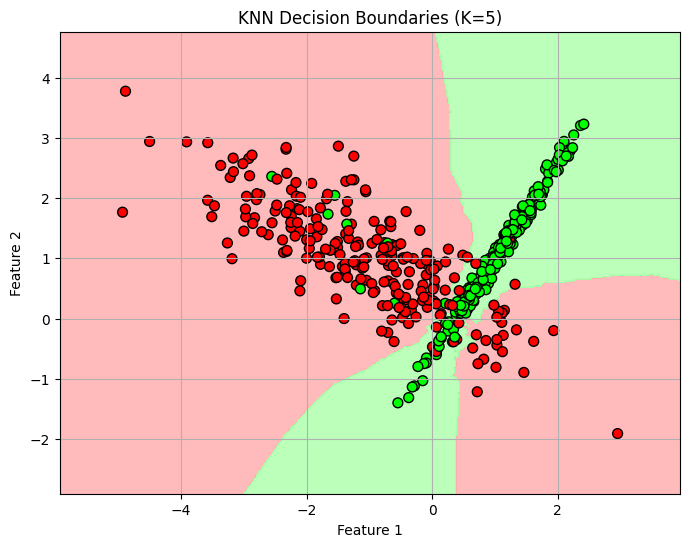

'\nINTERPRETATION:\n- The colored background shows the decision regions\n- Points show actual class labels\n- Observe how increasing K would smooth the boundary\n'

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap

# ======================================================================
# 1. GENERATE SYNTHETIC DATA 
# ======================================================================
print("STEP 1: GENERATE SYNTHETIC DATA".center(70, '='))

"""
CORRECTION EXPLANATION:
- Default n_informative=2, n_redundant=2 would require n_features >=4
- For n_features=2, we must set n_informative <=2 and n_redundant=0
"""
# With `n_features=2`, the sum of informative+redundant+repeated must be ≤2
X, y = make_classification(
    n_samples=500,
    n_features=2,           # Only 2 features for visualization
    n_informative=2,        # Both features are informative
    n_redundant=0,          # No redundant features
    n_repeated=0,           # No repeated features
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.05,
    random_state=42
)

# Split data (unchanged)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title("Synthetic Classification Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Class")
plt.grid(True)
plt.show()

# ======================================================================
# 2. TRAIN KNN CLASSIFIER
# ======================================================================
print("\nSTEP 2: TRAIN KNN CLASSIFIER".center(70, '='))

"""
KNN PARAMETERS:
- n_neighbors: Number of neighbors to consider (K)
- weights: 'uniform' (all neighbors equal) or 'distance' (weight by inverse distance)
- p: Power parameter for Minkowski metric (1=Manhattan, 2=Euclidean)
"""

knn = KNeighborsClassifier(
    n_neighbors=5,    # Start with K=5
    weights='uniform', # All neighbors contribute equally
    p=2               # Euclidean distance
)

knn.fit(X_train, y_train)

# ======================================================================
# 3. EVALUATE PERFORMANCE
# ======================================================================
print("\nSTEP 3: EVALUATE PERFORMANCE".center(70, '='))

# Predict on test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy:.3f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

"""
INTERPRETATION:
- Diagonal elements show correct predictions
- Off-diagonal shows misclassifications
"""

# ======================================================================
# 4. VISUALIZE DECISION BOUNDARIES
# ======================================================================
print("\nSTEP 4: VISUALIZE DECISION BOUNDARIES".center(70, '='))

# Create a mesh grid for plotting
h = 0.02  # Step size in mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class for each mesh point
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=50)
plt.title("KNN Decision Boundaries (K=5)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.grid(True)
plt.show()

"""
INTERPRETATION:
- The colored background shows the decision regions
- Points show actual class labels
- Observe how increasing K would smooth the boundary
"""

### Common Pitfalls to Avoid:
1. **Default Parameters Trap**:
   - `make_classification()` defaults assume `n_features≥4`
   - Always check parameter interactions

2. **Visualization Requirements**:
   - For 2D plots, you must have exactly `n_features=2`
   - For 3D plots, use `n_features=3`

3. **Classification Complexity**:
   - `flip_y` controls noise (keep ≤0.1 for clear separation)
   - `class_sep` controls cluster separation (higher = easier)

# **Program 2: Finding Optimal K with Cross-Validation**
### **Objective**: Determine the best K value using cross-validation.

```python
"""
FINDING OPTIMAL K FOR KNN
=========================
This program demonstrates:
1. Using cross-validation to find optimal K
2. Analyzing bias-variance tradeoff
3. Visualizing accuracy vs K
"""

==========================STEP 1: LOAD DATA===========================

Dataset shape: (569, 30)
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness']...
STEP 2: FIND OPTIMAL K========================

Optimal K: 10
Highest CV Accuracy: 0.970
STEP 3: VISUALIZE K SELECTION====================


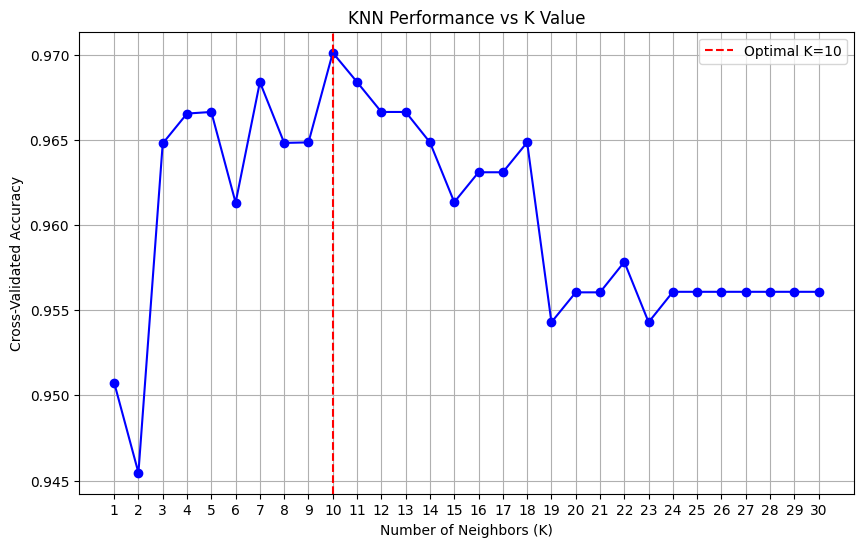

STEP 4: FINAL MODEL=========================

Model trained with optimal K:
K = 10, Metric = Euclidean


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# ======================================================================
# 1. LOAD AND PREPARE DATA
# ======================================================================
print("STEP 1: LOAD DATA".center(70, '='))

# Load Wisconsin Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

print(f"\nDataset shape: {X.shape}")
print(f"Feature names: {feature_names[:5]}...")  # Show first 5 features

# Standardize features (critical for KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ======================================================================
# 2. FIND OPTIMAL K WITH CROSS-VALIDATION
# ======================================================================
print("\nSTEP 2: FIND OPTIMAL K".center(70, '='))

"""
WHY CROSS-VALIDATION?
- More reliable than single train/test split
- Reduces variance in performance estimation
"""

# Test K values from 1 to 30
k_range = range(1, 31)
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find K with highest accuracy
optimal_k = k_range[np.argmax(cv_scores)]
print(f"\nOptimal K: {optimal_k}")
print(f"Highest CV Accuracy: {max(cv_scores):.3f}")

# ======================================================================
# 3. VISUALIZE ACCURACY VS K
# ======================================================================
print("\nSTEP 3: VISUALIZE K SELECTION".center(70, '='))

plt.figure(figsize=(10, 6))
plt.plot(k_range, cv_scores, 'bo-')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal K={optimal_k}')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Cross-Validated Accuracy")
plt.title("KNN Performance vs K Value")
plt.xticks(k_range)
plt.grid(True)
plt.legend()
plt.show()

"""
INTERPRETATION:
- Small K: High variance (overfitting)
- Large K: High bias (underfitting)
- Optimal K balances both (usually in middle range)
"""

# ======================================================================
# 4. TRAIN FINAL MODEL WITH OPTIMAL K
# ======================================================================
print("\nSTEP 4: FINAL MODEL".center(70, '='))

final_knn = KNeighborsClassifier(n_neighbors=optimal_k)
final_knn.fit(X_scaled, y)

# Feature importance (based on permutation importance)
print("\nModel trained with optimal K:")
print(f"K = {optimal_k}, Metric = Euclidean")


# **Program 3: KNN Regression**
### **Objective**: Implement KNN for regression tasks.

```python
"""
KNN REGRESSION DEMONSTRATION
============================
This program demonstrates:
1. Using KNN for regression
2. Comparing different K values
3. Evaluating with RMSE
"""

========================STEP 1: GENERATE DATA=========================


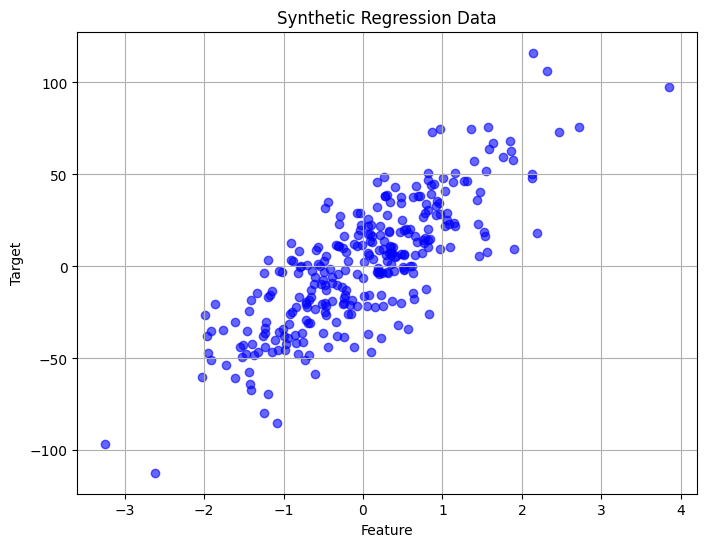

STEP 2: TRAIN KNN REGRESSOR=====================
STEP 3: EVALUATE MODEL========================

Root Mean Squared Error (RMSE): 23.60
STEP 4: VISUALIZE RESULTS======================


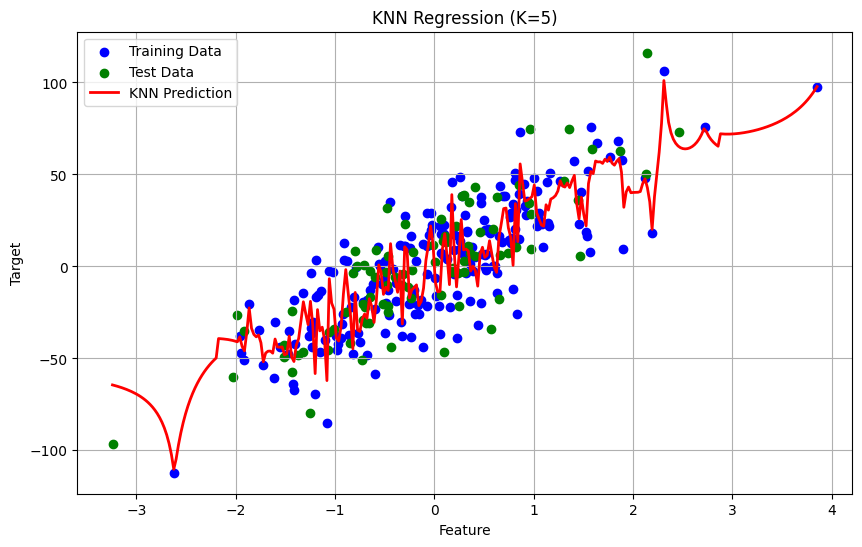

STEP 5: COMPARE K VALUES=======================


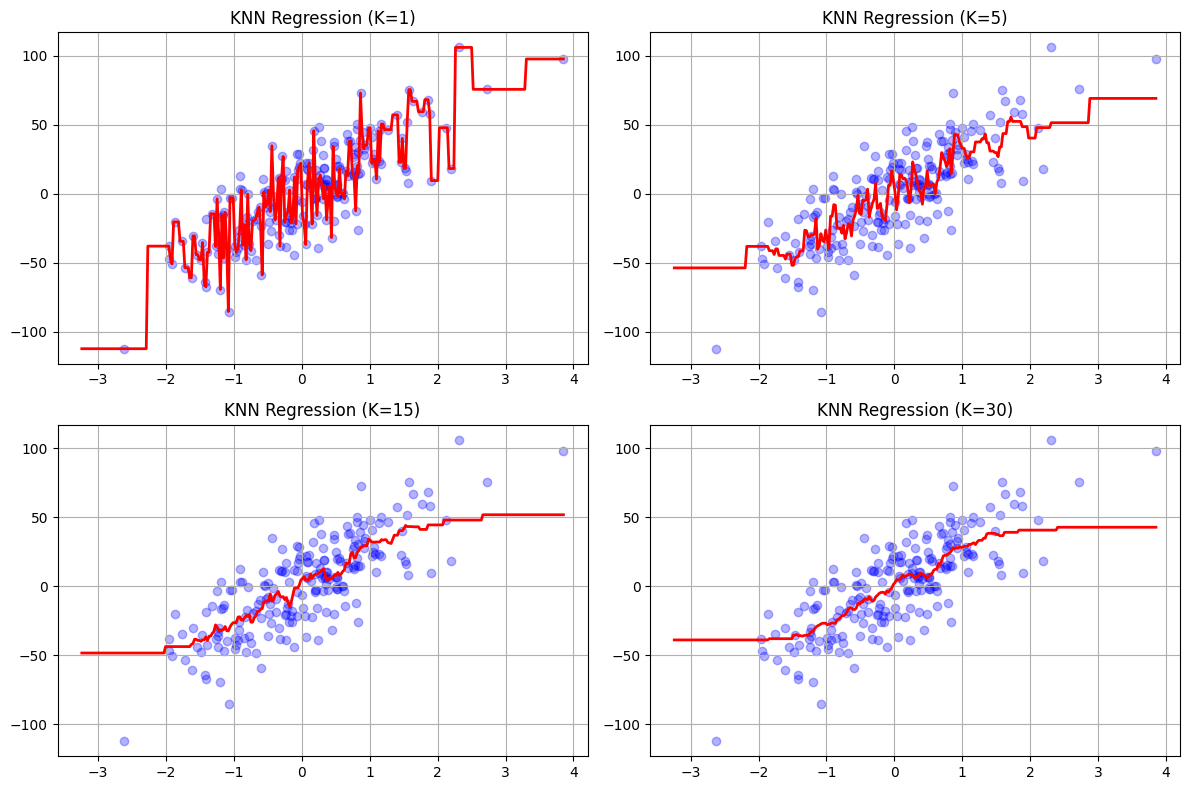

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# ======================================================================
# 1. GENERATE REGRESSION DATA
# ======================================================================
print("STEP 1: GENERATE DATA".center(70, '='))

# Create synthetic regression data with some noise
X, y = make_regression(
    n_samples=300, 
    n_features=1,          # Single feature for visualization
    noise=20,              # Add realistic noise
    random_state=42
)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.6)
plt.title("Synthetic Regression Data")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.grid(True)
plt.show()

# ======================================================================
# 2. TRAIN KNN REGRESSOR
# ======================================================================
print("\nSTEP 2: TRAIN KNN REGRESSOR".center(70, '='))

knn_reg = KNeighborsRegressor(
    n_neighbors=5,
    weights='distance'  # Closer points have more influence
)

knn_reg.fit(X_train, y_train)

# ======================================================================
# 3. EVALUATE PERFORMANCE
# ======================================================================
print("\nSTEP 3: EVALUATE MODEL".center(70, '='))

y_pred = knn_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"\nRoot Mean Squared Error (RMSE): {rmse:.2f}")

# ======================================================================
# 4. VISUALIZE PREDICTIONS
# ======================================================================
print("\nSTEP 4: VISUALIZE RESULTS".center(70, '='))

# Create test points for smooth curve visualization
X_plot = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_plot = knn_reg.predict(X_plot)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_plot, y_plot, color='red', linewidth=2, label='KNN Prediction')
plt.title("KNN Regression (K=5)")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.grid(True)
plt.show()

"""
INTERPRETATION:
- The red line shows KNN's piecewise constant predictions
- Smaller K would make the curve more wiggly (overfitting)
- Larger K would make it smoother (underfitting)
"""

# ======================================================================
# 5. COMPARE DIFFERENT K VALUES
# ======================================================================
print("\nSTEP 5: COMPARE K VALUES".center(70, '='))

k_values = [1, 5, 15, 30]
plt.figure(figsize=(12, 8))

for i, k in enumerate(k_values, 1):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_plot = knn.predict(X_plot)
    
    plt.subplot(2, 2, i)
    plt.scatter(X_train, y_train, color='blue', alpha=0.3)
    plt.plot(X_plot, y_plot, color='red', linewidth=2)
    plt.title(f"KNN Regression (K={k})")
    plt.grid(True)

plt.tight_layout()
plt.show()



# **Optional Exercises**
1. **Decision Boundary Analysis**  
   - In Program 1, test `K=1` and `K=50`. How do decision boundaries change?  
   - Which K shows signs of overfitting/underfitting?  

2. **Feature Scaling Impact**  
   - Run Program 2 without standardization. How does accuracy change?  

3. **Distance Metrics**  
   - Compare Manhattan (`p=1`) vs Euclidean (`p=2`) distance in Program 1.  

4. **Real-World Application**  
   - Apply KNN to the Iris dataset for classification. Compare with K-Means clusters.  

---

# **Discussion Questions**
1. **When does KNN perform poorly?**  
   - High-dimensional data (curse of dimensionality)  
   - Imbalanced datasets  

2. **How does K affect bias/variance?**  
   - Small K → Low bias, high variance  
   - Large K → High bias, low variance  

3. **Alternatives to KNN?**  
   - Decision trees (for non-metric data)  
   - SVM (for high-dimensional spaces)  

4. **Business Applications?**  
   - Recommendation systems  
   - Anomaly detection  

---

